In [28]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

sp.init_printing()

In [29]:
x = sp.Symbol('x', real = True)
k = sp.Symbol('k', real = True, positive = True)
a = sp.Symbol('a', real = True)
fop = sp.Symbol('fop')
fopsquare = sp.Symbol('fopsquare')
m = sp.Symbol('m', real = True, positive = True)
h = sp.Symbol('hbar', real = True, positive = True)
t = sp.Symbol('t', real = True, positive = True)
psi = sp.Function('\psi')
n = sp.Symbol('n', integer = True)

x, k, a, psi(x), n, m, h, t

In [30]:
psi(x).diff(x, x)
-k**2 * psi(x)
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
sol 

In [31]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0})
sol 


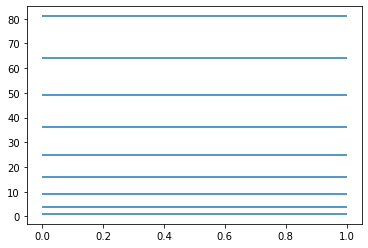

In [32]:
plt.hlines(np.arange(1, 10)**2, 0, 1)

In [33]:
sol = sol.subs(k, n * sp.pi / a)
sol

In [34]:
sol.lhs, sol.rhs

In [35]:
sol.rhs**2

In [36]:
sp.integrate(sol.rhs**2, (x, 0, a))

⎧  2               
⎪C₁ ⋅a      π⋅n    
⎪─────  for ─── ≠ 0
⎨  2         a     
⎪                  
⎪  0     otherwise 
⎩                  

In [37]:
sp.Symbol('C1')

In [38]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

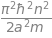

In [39]:
E = n**2 * sp.pi**2 * h**2 / (2 * m * a**2)
E

In [40]:
phi = sp.exp(-sp.I * E * t / h)
phi

In [41]:
Psi = sol.rhs * phi
Psi

In [42]:
Psi.subs({a: 1, h: 1, m: 1})

In [43]:
Psif = lambdify((x, t, n), Psi.subs({a: 1, h: 1, m: 1}))

In [44]:
Psif(0.3, 0.2, 1), Psif(0.3, 0.2, 1).real, Psif(0.3, 0.2, 1).imag

((0.6306730671332264-0.9546038323659279j),
 0.6306730671332264,
 -0.9546038323659279)

In [ ]:
xs = np.linspace(0, 1, 100)
Psif(xs, 0.2, 1)

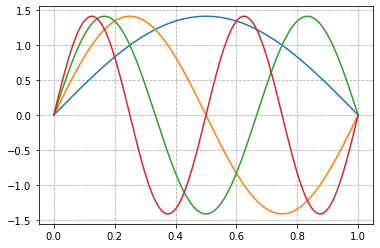

In [46]:
xs = np.linspace(0, 1, 1000)

plt.grid(linestyle = '--')

plt.plot(xs, Psif(xs, 0, 1).real)
plt.plot(xs, Psif(xs, 0, 2).real)
plt.plot(xs, Psif(xs, 0, 3).real)
plt.plot(xs, Psif(xs, 0, 4).real)

In [ ]:
n = 5
xs = np.linspace(0, 1, 1000)
fig = plt.figure()
plt.grid(linestyle = '--')

plot1, = plt.plot([], [])
plot2, = plt.plot([], [])
plt.xlim(0, 1)
plt.ylim(-1.5, 1.5)

plt.close()
dt = 0.001
def frame(i):
    t = i * dt
    ys = Psif(xs, t, n)
    plot1.set_data(xs, ys.real)
    plot2.set_data(xs, ys.imag)
    return plot1, plot2

anim = FuncAnimation(fig, frame, 300, interval = 20, blit = True)
HTML(anim.to_jshtml())


In [ ]:
n = 5
xs = np.linspace(0, 1, 1000)
fig = plt.figure()
plt.grid(linestyle = '--')

plot1, = plt.plot([], [])

plt.xlim(0, 1)
plt.ylim(0, 2.5)

plt.close()
dt = 0.001
def frame(i):
    t = i * dt
    ys = Psif(xs, t, n)
    plot1.set_data(xs, np.abs(ys)**2)
    
    return plot1, 

anim = FuncAnimation(fig, frame, 300, interval = 20, blit = True)
HTML(anim.to_jshtml())


In [ ]:

xs = np.linspace(0, 1, 1000)
fig = plt.figure()
plt.grid(linestyle = '--')

plot1, = plt.plot([], [])

plt.xlim(0, 1)
plt.ylim(0, 6)

plt.close()
dt = 0.001
def frame(i):
    t = i * dt
    ys = (Psif(xs, t, 1) + Psif(xs, t, 2) + Psif(xs, t, 3) + Psif(xs, t, 3) + Psif(xs, t, 4)) / np.sqrt(4)
    plot1.set_data(xs, np.abs(ys)**2)
    
    return plot1, 

anim = FuncAnimation(fig, frame, 300, interval = 20, blit = True)
HTML(anim.to_jshtml())


In [ ]:
sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()

In [51]:
sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()

⎧ 2       2             
⎪a       a              
⎪── - ───────  for n ≠ 0
⎨3       2  2           
⎪     2⋅π ⋅n            
⎪                       
⎩     0        otherwise

In [52]:
sol.rhs
fop = -1 * sp.I * h * sp.diff(sol.rhs, x, 1)
sp.integrate(sol.rhs * fop, (x, 0, a)).simplify()

In [53]:
sol.rhs
fopsquare = -1 * h**2 * sp.diff(sol.rhs, x, 2)
sp.integrate(sol.rhs * fopsquare, (x, 0, a)).simplify()

⎧ 2  2  2             
⎪π ⋅h̅ ⋅n       π⋅n    
⎪────────  for ─── ≠ 0
⎨    2          a     
⎪   a                 
⎪                     
⎩   0       otherwise 